In [24]:
import pandas as pd
import torch
import joblib
import numpy as np
import math
import matplotlib.pyplot as plt
from torch import nn
from torchviz import make_dot
from torchview import draw_graph
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [25]:
df = pd.read_csv('diabetes_data.csv')
df.dropna(inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [26]:
#Count the binary values in the 'Outcome' column
outcome_counts = df['Outcome'].value_counts()

#Print the counts
print(outcome_counts)

#Insight: Unbalanced dataset

Outcome
0    500
1    268
Name: count, dtype: int64


In [27]:
x = df.drop(columns=['Outcome'])
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

x_train_tensor = torch.tensor(x_train.values).to(torch.float32)
x_test_tensor = torch.tensor(x_test.values).to(torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [28]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    #input layer
    self.layer1 = nn.Linear(8,70)
    self.relu1 = nn.ReLU()

    self.layer2 = nn.Linear(70,70)
    self.relu2 = nn.ReLU()

    self.layer3 = nn.Linear(70,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.layer1(x)
    x = self.relu1(x)

    x = self.layer2(x)
    x = self.relu2(x)

    x = self.layer3(x)
    pred = self.sigmoid(x)
    return pred #returns prediction

In [29]:
model = NeuralNetwork()
loss_fn = nn.BCELoss()

#BACK PROPAGATION, optimizers (gradient descent optimizer)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)# parameters that will be updated

In [30]:
#set the model into training mode
model.train()

for epoch in range(100):
  for i in range(0, len(x_train), 5):
    #Calculate how far from true value
    pred = model(x_train_tensor[i:i+1])
    loss = loss_fn(pred, y_train_tensor[i:i+1]) #generate a loss, error score

    #Update the weights
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 0.1831001490354538
Epoch 2, Loss: 0.22716890275478363
Epoch 3, Loss: 0.22742776572704315
Epoch 4, Loss: 0.23862896859645844
Epoch 5, Loss: 0.28832361102104187
Epoch 6, Loss: 0.32590773701667786
Epoch 7, Loss: 0.3303297460079193
Epoch 8, Loss: 0.38595545291900635
Epoch 9, Loss: 0.3435463309288025
Epoch 10, Loss: 0.3186118006706238
Epoch 11, Loss: 0.30010560154914856
Epoch 12, Loss: 0.2945619821548462
Epoch 13, Loss: 0.3382452726364136
Epoch 14, Loss: 0.3387755751609802
Epoch 15, Loss: 0.3263455927371979
Epoch 16, Loss: 0.38955292105674744
Epoch 17, Loss: 0.40173205733299255
Epoch 18, Loss: 0.37866783142089844
Epoch 19, Loss: 0.3592909276485443
Epoch 20, Loss: 0.37329599261283875
Epoch 21, Loss: 0.36991122364997864
Epoch 22, Loss: 0.3453606069087982
Epoch 23, Loss: 0.3823617100715637
Epoch 24, Loss: 0.3744696080684662
Epoch 25, Loss: 0.3876737058162689
Epoch 26, Loss: 0.3798612952232361
Epoch 27, Loss: 0.3397097587585449
Epoch 28, Loss: 0.39140254259109497
Epoch 29, Loss: 

In [31]:
model.eval()  #Set model to evaluation mode
predictions = []

for i in range(len(x_test)):
    with torch.no_grad():
        pred = model(x_test_tensor[i]).round()
        predictions.append(pred.item())  # Append the prediction as a scalar

# Convert predictions to a NumPy array
y_pred = np.array(predictions)
y_true = y_test_tensor.numpy().flatten()  # Convert y_test_tensor to NumPy array

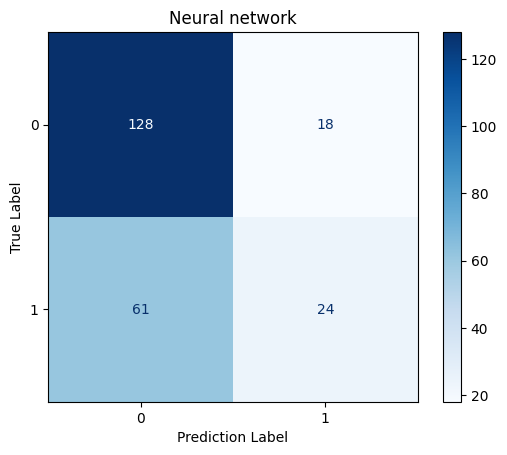

Accuracy: 65.80%
Precision: 57.14%
Recall: 28.24%
F1-score: 37.80%


In [32]:
acc_nn1 = accuracy_score(y_true, y_pred)
precision_nn1 = precision_score(y_true, y_pred)
recall_nn1 = recall_score(y_true, y_pred)
f1_score_nn1 = f1_score(y_true, y_pred)
cm_nn = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp.plot(cmap="Blues")
plt.xlabel("Prediction Label")
plt.ylabel("True Label")
plt.title("Neural network")
plt.show()
# Print results
print(f'Accuracy: {acc_nn1*100:.2f}%')
print(f'Precision: {precision_nn1*100:.2f}%')
print(f'Recall: {recall_nn1*100:.2f}%')
print(f"F1-score: {f1_score_nn1*100:.2f}%")

In [33]:
torch.save(model.state_dict(), 'nn-model.pth')

/Users/robin/Documents/GitHub/CSCI_111_Final_Project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


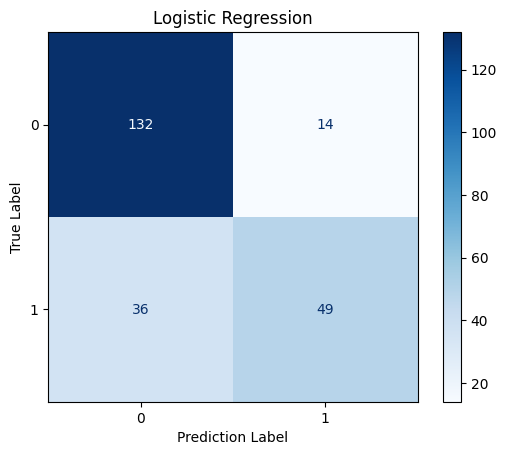

This is the model's Accuracy 78.35%.
This is the model's Precision score 77.78%.
This is the model's Recall score 57.65%.
This is the model's F1 score 66.22%.


In [34]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_predicted = logistic_model.predict(x_test)
logistic_accuracy = accuracy_score(y_test, logistic_predicted)
logistic_recall = recall_score(y_test, logistic_predicted)
logistic_precision = precision_score(y_test, logistic_predicted)
logistic_f1 = f1_score(y_test, logistic_predicted)

cm = confusion_matrix(y_test, logistic_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.xlabel("Prediction Label")
plt.ylabel("True Label")
plt.title("Logistic Regression")
plt.show()
# print(f"This is the model's coef_ {logistic_model.coef_}.")
# print(f"This is the model's intercepts {logistic_model.intercept_}.")
# print(f"These are the model's predictions {logistic_predicted}.")
print(f"This is the model's Accuracy {(logistic_accuracy*100):.2f}%.")
print(f"This is the model's Precision score {logistic_precision*100:.2f}%.")
print(f"This is the model's Recall score {logistic_recall*100:.2f}%.")
print(f"This is the model's F1 score {logistic_f1*100:.2f}%.")
